In [26]:
import random
import math

#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)


    
#K-Means Algorithm
def kmeans(k,datapoints):

    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 
    
    #Limit our iterations
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers += [random.choice(datapoints)]
        
        
    
    while (cluster != prev_cluster) or (i > Max_Iterations)  :
        
        prev_cluster = list(cluster)
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(datapoints)
        
                    
            
            cluster_centers[k] = new_center
    
        
    print ("======== Results ========")
    print ("Clusters", cluster_centers)
    print ("Iterations",i)
    print ("Assignments", cluster)
    
    
#TESTING THE PROGRAM#
if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    datapoints = [(3,2),(2,2),(1,2),(0,1),(1,0),(1,1),(5,6),(7,7),(9,10),(11,13),(12,12),(12,13),(13,13)]

    k = 3 # K - Number of Clusters
      
    kmeans(k,datapoints)

======== Results ========
Clusters [[11.4, 12.2], [6.0, 6.5], [1.3333333333333333, 1.3333333333333333]]
Iterations 5
Assignments [2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0]


C:\Users\bidahsamia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


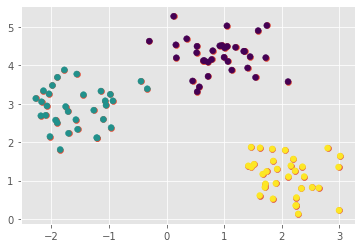

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans 
# Générer des données:
X, y = make_blobs(n_samples=100, centers = 3, cluster_std=0.5, random_state=0) #nb_feat
#nb_features = 2 par défaut
plt.scatter(X[:,0], X[:, 1])
# Entrainer le modele de K-mean Clustering
model = KMeans(n_clusters=3)
model.fit(X) 
#Visualiser les Clusters
predictions = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=predictions) 